In [39]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [5]:
from google.colab import files
uploaded = files.upload()


Saving edited.csv to edited.csv


In [6]:
df=pd.read_csv("edited.csv")
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,Unnamed: 7,final_level,Unnamed: 9,final_goal
0,[ Intermediate ],[ Muscle & Sculpting Bodyweight Fitnes...,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Intermediate,Muscle & Sculpting Bodyweight Fitness,Muscle & Sculpting Bodyweight Fitness
1,"[ Advanced , Intermediate ]",[ Bodybuilding ],Full Gym,8.0,60.0,224.0,3.0,"Advanced , Intermediate",Advanced Intermediate,Bodybuilding,Bodybuilding
2,"[ Beginner , Novice , Intermediate ]","[ Athletics , Powerlifting , Powerbuild...",Full Gym,6.0,90.0,237.0,0.0,"Beginner , Novice , Intermediate",Beginner Novice Intermediate,"Athletics , Powerlifting , Powerbuildi...",Athletics Powerlifting Powerbuilding
3,"[ Intermediate , Advanced ]",[ Powerbuilding ],Garage Gym,10.0,70.0,280.0,1.0,"Intermediate , Advanced",Intermediate Advanced,Powerbuilding,Powerbuilding
4,"[ Intermediate , Advanced ]","[ Powerbuilding , Powerlifting , Bodybu...",Full Gym,10.0,80.0,356.0,3.0,"Intermediate , Advanced",Intermediate Advanced,"Powerbuilding , Powerlifting , Bodybui...",Powerbuilding Powerlifting Bodybuild...


In [7]:
df=df.drop(["level","goal","Unnamed: 7","Unnamed: 9"],axis=1)
df.head()

,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,final_level,final_goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


In [8]:
df=df.rename(columns={"final_level":"Level","final_goal":"Goal","equipment":"Equipment","program_length":"Program Length","time_per_workout":"Time per Workout","total_exercises":"Total Exercises"})
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


In [9]:
df["Program Length"]=df["Program Length"].astype('Int64')
df["Time per Workout"]=df["Time per Workout"].astype('Int64')
df["Total Exercises"]=df["Total Exercises"].astype('Int64')
df["Cluster_ID"]=df["Cluster_ID"].astype("Int64")
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
2,Full Gym,6,90,237,0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


In [10]:
df.isnull().sum()

,0
Equipment,26
Program Length,26
Time per Workout,25
Total Exercises,25
Cluster_ID,25
Level,33
Goal,33


In [11]:
df=df.dropna()
df.count()


,0
Equipment,2589
Program Length,2589
Time per Workout,2589
Total Exercises,2589
Cluster_ID,2589
Level,2589
Goal,2589


In [12]:
#-- Converting Garage Gym and Dumbell Only for At Home --

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
df["Equipment"]=df["Equipment"].replace({"Dumbbell Only":"At Home","Garage Gym":"At Home"})
df["Equipment"].unique()

array(['Full Gym', 'At Home'], dtype=object)

In [ ]:
#-- Removing Novice from the Level Column to only get 3 labels --

In [15]:
# By this we Dropped the whole row containing Novice

In [16]:
df=df[~df["Level"].str.contains("Novice",case=False)]
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
3,At Home,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...
6,Full Gym,12,60,324,3,Intermediate,Bodybuilding


In [17]:
#Multi Hot Encoding Level Column

In [18]:
# Split the string by spaces or commas
# Split by spaces and remove empty strings
df['Level'] = df['Level'].str.split(r'\s+').apply(lambda x: [i.strip() for i in x if i.strip() != ''])




mlb_level = MultiLabelBinarizer()
level_encoded = pd.DataFrame(mlb_level.fit_transform(df['Level']),
                             columns=mlb_level.classes_,
                             index=df.index)

# Drop original columns and add encoded ones
df = df.drop(['Level'], axis=1)
df = pd.concat([df,level_encoded], axis=1)

df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Goal,Advanced,Beginner,Intermediate
0,Full Gym,12,90,384,4,Muscle & Sculpting Bodyweight Fitness,0,0,1
1,Full Gym,8,60,224,3,Bodybuilding,1,0,1
3,At Home,10,70,280,1,Powerbuilding,1,0,1
4,Full Gym,10,80,356,3,Powerbuilding Powerlifting Bodybuild...,1,0,1
6,Full Gym,12,60,324,3,Bodybuilding,0,0,1


In [19]:
#Multi hot encoding Goal Column

In [20]:
categories = [
    'Athletics',
    'Bodybuilding',
    'Olympic',
    'Weightlifting',
    'Muscle & Sculpting',
    'Bodyweight Fitness',
    'Powerbuilding',
    'Powerlifting'
]

# Clean the Goal column (remove extra spaces)
df['Goal'] = df['Goal'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Multi-label one-hot encoding
for cat in categories:
    df[cat] = df['Goal'].apply(lambda x: 1 if cat.lower() in x.lower() else 0)

df=df.drop(["Goal"],axis=1)
print(df[categories].head())

   Athletics  Bodybuilding  Olympic  Weightlifting  Muscle & Sculpting  \
0          0             0        0              0                   1   
1          0             1        0              0                   0   
3          0             0        0              0                   0   
4          0             1        0              0                   1   
6          0             1        0              0                   0   

   Bodyweight Fitness  Powerbuilding  Powerlifting  
0                   1              0             0  
1                   0              0             0  
3                   0              1             0  
4                   0              1             1  
6                   0              0             0  


In [21]:
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting
0,Full Gym,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0
1,Full Gym,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0
3,At Home,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0
4,Full Gym,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1
6,Full Gym,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0


In [22]:
#Moving Target column (Equipment) to the end

In [23]:
col=df.pop("Equipment")
df["Equipment"]=col
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,Full Gym
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,Full Gym
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,At Home
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,Full Gym
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,Full Gym


In [24]:
#Mapping Target Column

In [25]:
df["Equipment"]=df["Equipment"].map({"Full Gym":0,"At Home":1})
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,0
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,0
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,1
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,0
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,0


In [26]:
df["Equipment"].value_counts()

,count
Equipment,
0,923
1,383


In [27]:
# Plotting Box Plots for Outlier Detection

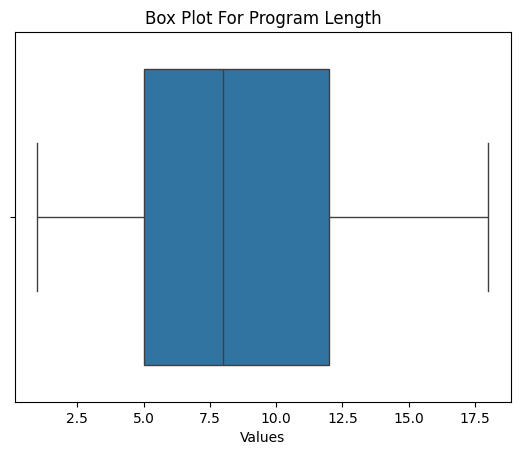

In [28]:
sns.boxplot(x=df["Program Length"])
plt.title("Box Plot For Program Length")
plt.xlabel("Values")
plt.show()

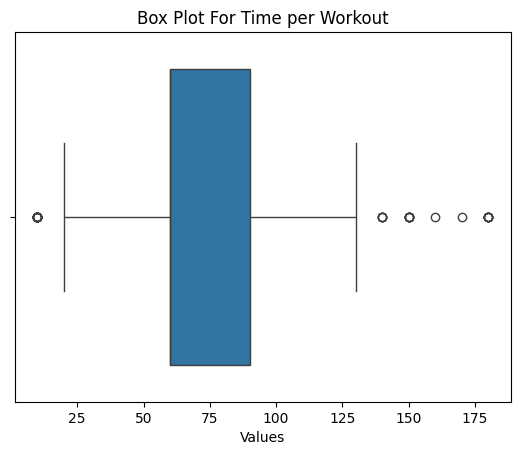

In [29]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.show()

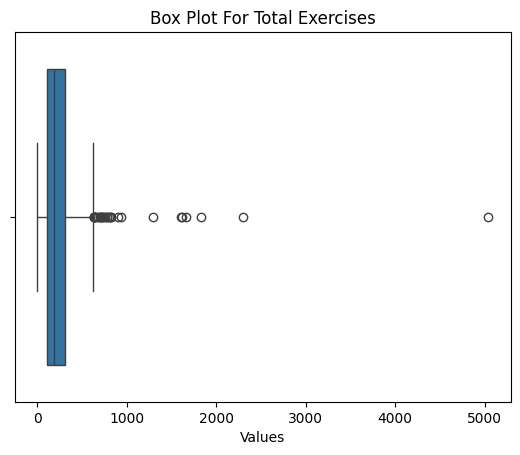

In [30]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.show()

In [31]:
# Outlier Removal for Time per workout


In [32]:
Q1=df["Time per Workout"].quantile(0.25)
Q3=df["Time per Workout"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Time per Workout"]>=lower) &(df["Time per Workout"]<=upper)]


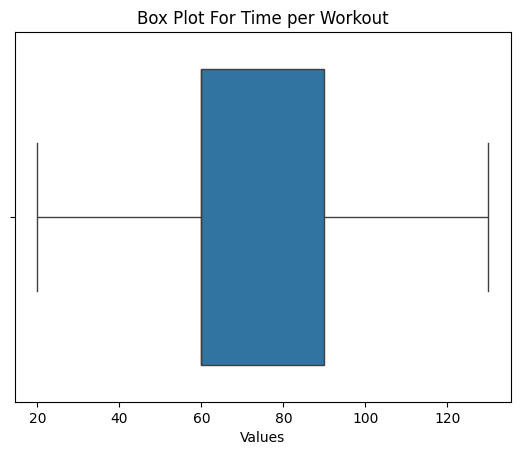

In [33]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.show()

In [34]:
# Outlier Removal for Total Exercises


In [35]:
Q1=df["Total Exercises"].quantile(0.25)
Q3=df["Total Exercises"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Total Exercises"]>=lower) &(df["Total Exercises"]<=upper)]

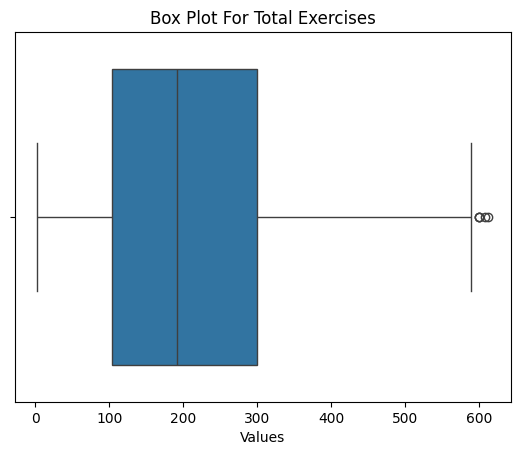

In [36]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.show()